In [59]:
import cupy
import pyclesperanto_prototype as cle

import time
import numpy as np
from cupyx.scipy.ndimage import gaussian_filter as cupy_gaussian_filter
from pyclesperanto_prototype import gaussian_blur as cle_gaussian_filter


In [66]:
image = np.random.random((200,200,200))

In [67]:
from cupyimg.skimage.feature.peak import peak_local_max

t = time.process_time()

cuda_image = cupy.asarray(image)
cuda_result = cupy_gaussian_filter(cuda_image, sigma=20)

elapsed_time = time.process_time() - t
print(elapsed_time)

0.015625


In [68]:
t = time.process_time()

ocl_image = cle.push(image)
ocl_result = cle_gaussian_filter(ocl_image, sigma_x=20, sigma_y=20, sigma_z=20)
result2 = cle.pull(ocl_result)

elapsed_time = time.process_time() - t
print(elapsed_time)

0.109375


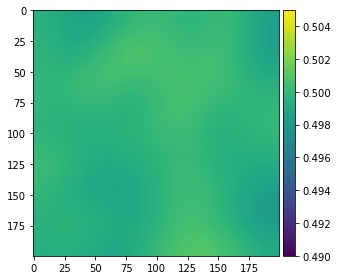

In [69]:
from skimage.io import imshow

imshow(result1[50], vmin=0.49, vmax=0.505)

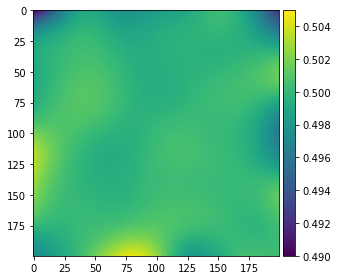

In [70]:
imshow(result2[50], vmin=0.49, vmax=0.505)

In [71]:
from cupyimg.skimage.feature.peak import peak_local_max

t = time.process_time()

cuda_image = cupy.asarray(image)
cuda_blurred = cupy_gaussian_filter(cuda_image, sigma=20)

res = peak_local_max(cuda_blurred, min_distance=1)

result1 = cupy.asnumpy(res)

elapsed_time = time.process_time() - t
print(elapsed_time)

CompileException: C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\cupy\core\include\cupy/complex/complex.h(94): warning: __host__ annotation is ignored on a function("complex") that is explicitly defaulted on its first declaration

C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\cupy\core\include\cupy/complex/complex.h(94): warning: __device__ annotation is ignored on a function("complex") that is explicitly defaulted on its first declaration

C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\cupy\core\include\cupy/complex/complex.h(101): warning: __host__ annotation is ignored on a function("complex") that is explicitly defaulted on its first declaration

C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\cupy\core\include\cupy/complex/complex.h(101): warning: __device__ annotation is ignored on a function("complex") that is explicitly defaulted on its first declaration

C:\Users\ROBERT~1\AppData\Local\Temp\tmpljxq0de1\7dc0f5bf0f642b710c0b8a179916eb98_2.cubin.cu(10): catastrophic error: cannot open source file "type_traits"

1 catastrophic error detected in the compilation of "C:\Users\ROBERT~1\AppData\Local\Temp\tmpljxq0de1\7dc0f5bf0f642b710c0b8a179916eb98_2.cubin.cu".
Compilation terminated.
